In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
dataSet = np.array([[0, 0],[1, 0],[2, 0],[0, 1],[1, 1],[2, 1],[3, 1], [4, 1],[5, 1],[100, 1],[0, 2],[1, 2],[2, 2],[3, 2],
                    [4, 2],[5, 2],[100, 2],[3, 3],[4, 3],[5, 3],[100, 3]])
x = dataSet
dataSet.shape[0]

21

In [86]:
output_data = []

for i in range(0,len(dataSet)):
    if(dataSet[i][1]  <= 2):
        output_data.append((1,0))
    else:
        output_data.append((0,1))
output_data = np.array(output_data)
output_data.shape

(21, 2)

In [70]:
c1 = np.asarray(list(filter(lambda x : x[1] <= 2, dataSet)))
c2 = np.asarray(list(filter(lambda x: x[1] > 2, dataSet)))
c1[1]
N1 = len(c1)
N2 = len(c2)
N = dataSet.shape[0]

In [100]:
len(c1)

17

In [94]:
m1 = np.mean(c1, axis = 0)
m2 = np.mean(c2, axis = 0)
diff_means = np.reshape(m1 - m2,(2,1))

In [101]:
c = np.zeros((2,2))

for i in range(0,c1.shape[0]):
    a = c1[i] - m1
    a = np.reshape(a, (2,1))
    b = a.T
    c = np.add(c,(np.matmul(a,b)))
c

array([[1.69215294e+04, 5.71764706e+01],
       [5.71764706e+01, 9.05882353e+00]])

In [102]:
d = np.zeros((2,2))

for i in range(0,c2.shape[0]):
    a = c2[i] - m2
    a = np.reshape(a, (2,1))
    b = a.T
    d = np.add(d,(np.matmul(a,b)))
d

array([[6914.,    0.],
       [   0.,    0.]])

In [103]:
S_w = np.add(c,d)
S_w
S_b = np.matmul(diff_means, diff_means.T)
S_b.shape
# a  = np.linalg.inv(S_w)
# w = np.matmul(a, m2 - m1)
# w

(2, 2)

In [104]:
f  = np.linalg.inv(np.add(S_w, (N1*N2/N) * S_b))
f
w = np.matmul(f, N * diff_means)
w

array([[-1.33511453e-03],
       [-1.92622413e+00]])

In [105]:
w1 = w[0]
w2 = w[1]
m = 1/N  *(np.add(N1 * m1, N2 * m2 ))
w_0 = - np.matmul(w.T, m)
w_0

array([3.04885766])

In [106]:
predictions = np.zeros(21)
accuracy = 0
for i in range(0, len(X)):
    y = np.matmul(w.T,np.reshape((dataSet[i] - m), (2,1)))
    if(y > 0):
        predictions[i] = 1
        print("C1")
    else:
        predictions[i] = 0
        print("C2")
    if(predictions[i] == output_data[i][0]):
        accuracy+=1
print(accuracy)
accuracy = accuracy / dataSet.shape[0]
print(accuracy * 100)

C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
14
66.66666666666666


In [109]:
print("{0} +{1} x1+{2} x2".format(w_0, w[0],w[1]))

[3.04885766] +[-0.00133511] x1+[-1.92622413] x2


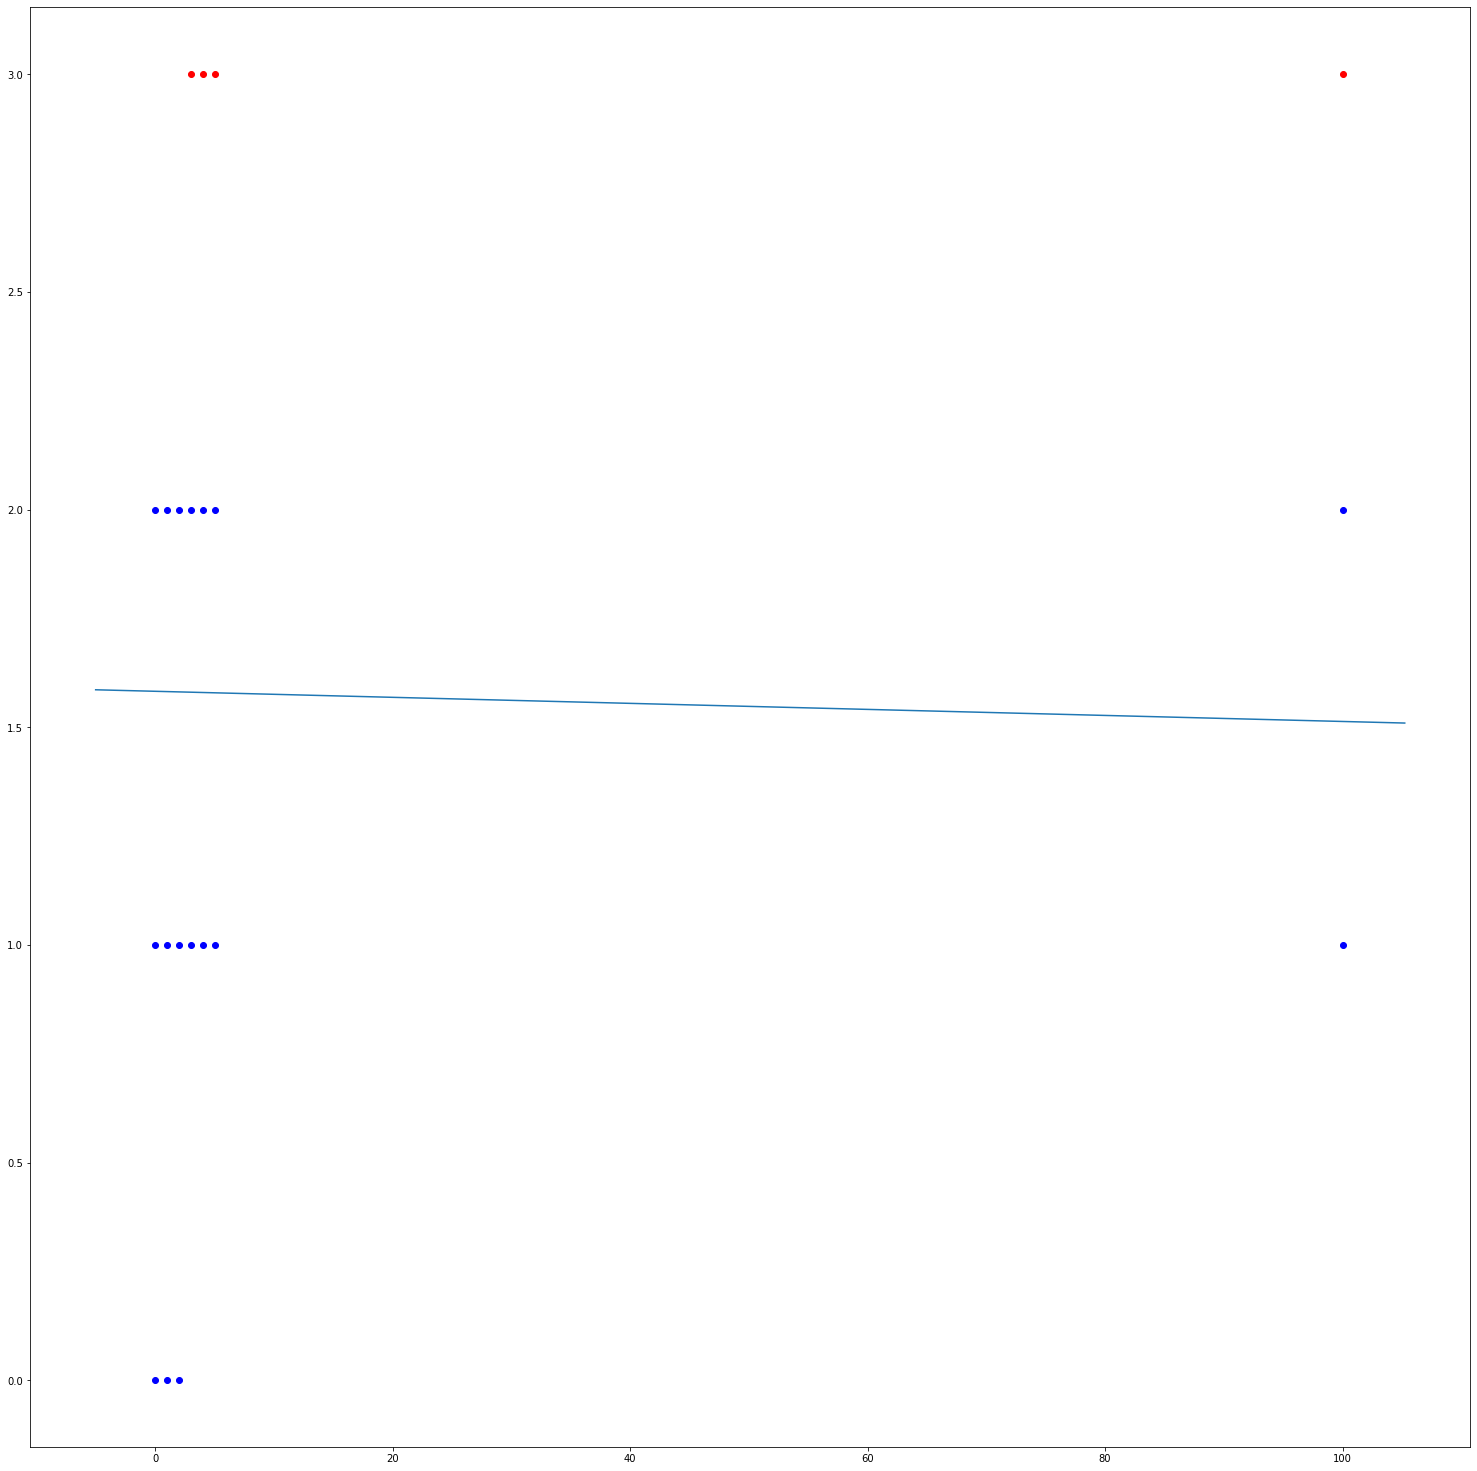

In [108]:
# Source: https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
def abline(slope=-0.00133511/1.92622413, intercept=3.04885766/1.92622413):
    """Plot a line from slope and intercept"""
#     axes = plot.gca()
    
    figure = plt.figure(figsize=(20, 20))
    axes= figure.add_axes([0,0,1,1])
    axes.scatter(c1[:, 0], c1[:, 1], color="blue")
    axes.scatter(c2[:, 0], c2[:, 1], color="red")
    
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')
    plt.show()
abline()